# **Prediksi Jumlah Partikel Jet dalam Tumbukan Proton-Proton**



Jet partikel adalah kumpulan partikel hadron (seperti pion, kaon) yang terbentuk ketika quark atau gluon yang terlepas dari tumbukan proton-proton dan mengalami hadronisasi yaitu proses di mana mereka mengikat diri dengan quark-antiquark baru dari vakum untuk membentuk hadron, akibat sifat confinement gaya kuat. Jet merepresentasikan arah dan energi quark/gluon asli, karena quark/gluon itu sendiri tidak pernah teramati secara langsung.

Adapun sumber literatur rujukannya sebagai berikut:

Sag, C.D. and Sahin, O. (2025) Predicting Jet Count in Proton-Proton Collisions using Machine Learning and Deep Learning Models, *Proceedings of the International Conference on Computer Science and Engineering*, Izmir Turk College Science. Available at: https://ieeexplore.ieee.org





#**Deskripsi Dataset**

Berkas ini berisi kejadian dari kumpulan data primer MultiJet dari rilis data terbuka CMS, dan menghitung variabel razor MR dan Rsq, yang digunakan dalam pencarian partikel supersimetris dalam LHC. Adapun sumber dataset sekunder ini diperoleh dari kaggle: <a href="https://www.kaggle.com/datasets/fedesoriano/multijet-primary-dataset/data">Predicting nJets Particle from Proton-Proton Collision<a/>.

Dataset berisikan 21.726 observasi dengan 17 fitur. Fitur-fitur diantaranya ialah:

1) Run: Nomor run dari event.
2) Lumi: Bagian lumi dari event.
3) Event: Nomor event dari event.
4) MR: Variabel kinematik silet pertama, variabel MR adalah estimasi skala massa keseluruhan, yang dalam batas produk peluruhan tak bermassa sama dengan massa partikel induk yang berat.
5) Rsq: Variabel kinematik silet kedua, variabel Rsq adalah kuadrat rasio R, yang mengkuantifikasi aliran energi dalam bidang tegak lurus terhadap balok dan pembagian momentum antara partikel tampak dan tak tampak.
6,7,8,9) E1,Px1,Py1,Pz1: Vektor keempat dari megajet terdepan (dengan momentum transversal terbesar).
10,11,12,13) ​​E2,Px2,Py2,Pz2: Vektor keempat dari megajet terdepan (dengan momentum transversal terbesar).
14) HT: Jumlah skalar momentum transversal jet.
15) MET: Besarnya jumlah vektor energi transversal partikel dalam peristiwa tersebut.
16) nJets: Jumlah jet dengan momentum transversal di atas 40 GeV.
17) nBJets: Jumlah jet berlabel b dengan momentum transversal di atas 40 GeV.

#**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.utils.class_weight import compute_sample_weight

#**Memuat Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Capstone/MultiJetRun2010B.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
0,148029,388,302318745,215.553,0.031977,136.7100,-109.893,-54.03420,-58.9032,142.1790,70.0254,41.12250,-116.5130,203.666,18.31100,2,0
1,148029,388,302323641,155.437,0.042157,83.3865,81.150,6.88361,-12.9688,73.9025,-72.2472,11.88350,3.0899,154.659,14.77470,2,0
2,148029,388,302336217,400.563,0.026938,253.1840,139.902,102.64000,-101.9350,535.5510,-110.3790,-89.09290,-516.1790,343.280,25.22110,3,0
3,148029,388,302382289,286.245,0.094192,175.4860,-156.024,-62.95350,-47.7434,112.8510,89.0843,3.45025,67.9007,257.397,46.02880,2,0
4,148029,388,302403873,204.514,0.018804,833.7950,100.410,-16.65900,-827.4980,445.6120,-91.1991,15.55830,-390.1440,269.492,8.11345,3,0


#**Exploratory Data Analysis**

Pada tahap ini, Anda akan melakukan Exploratory Data Analysis (EDA) untuk memahami karakteristik dataset. EDA bertujuan untuk:

1.  **Memahami Struktur Data**

   Tinjau jumlah baris dan kolom dalam dataset.
Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
2.  **Menangani Data yang Hilang**

   Identifikasi dan analisis data yang hilang (missing values). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.
3.  **Analisis Distribusi dan Korelasi**

   Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.
Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.
4.  **Visualisasi Data**

   Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.
Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.


Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
print("Jumlah data duplikat: ", df.duplicated().sum())
df.info()

Jumlah data duplikat:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21726 entries, 0 to 21725
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     21726 non-null  int64  
 1   Lumi    21726 non-null  int64  
 2   Event   21726 non-null  int64  
 3   MR      21726 non-null  float64
 4   Rsq     21726 non-null  float64
 5   E1      21726 non-null  float64
 6   Px1     21726 non-null  float64
 7   Py1     21726 non-null  float64
 8   Pz1     21726 non-null  float64
 9   E2      21726 non-null  float64
 10  Px2     21726 non-null  float64
 11  Py2     21726 non-null  float64
 12  Pz2     21726 non-null  float64
 13  HT      21726 non-null  float64
 14  MET     21726 non-null  float64
 15  nJets   21726 non-null  int64  
 16  nBJets  21726 non-null  int64  
dtypes: float64(12), int64(5)
memory usage: 2.8 MB


In [ ]:
df.describe()

,Run,Lumi,Event,MR,Rsq,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT,MET,nJets,nBJets
count,21726.000000,21726.000000,2.172600e+04,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000,21726.000000
mean,148666.049710,900.693501,8.635646e+08,351.981435,0.023253,297.178955,0.283289,0.764211,-8.523257,277.410117,-0.399385,-0.909938,-1.915512,242.328342,16.005371,2.435791,0.053668
std,596.085618,496.482684,4.786516e+08,193.691363,0.023291,224.040020,91.701247,90.770124,341.366770,206.890743,76.720135,75.758491,321.415092,78.841528,10.797882,0.655750,0.236334
min,147926.000000,388.000000,3.023155e+08,29.999900,0.000009,44.947600,-543.821000,-648.385000,-2022.310000,42.048600,-700.112000,-459.801000,-1647.600000,120.938000,0.100445,2.000000,0.000000
25%,148029.000000,463.000000,4.976106e+08,229.790750,0.007907,143.531000,-78.472975,-75.770000,-151.347750,126.916250,-63.333250,-62.706450,-154.231750,193.252000,8.626845,2.000000,0.000000
50%,149181.000000,986.000000,9.709389e+08,292.911000,0.016817,212.060500,-0.310509,1.238670,-5.478110,204.140000,-0.548208,-1.900460,-1.803295,223.696000,14.035000,2.000000,0.000000
75%,149181.000000,999.000000,9.844834e+08,406.883000,0.031612,374.542750,78.562475,77.738075,135.345250,366.710500,62.852025,61.111550,151.167750,269.241500,21.091050,3.000000,0.000000
max,149181.000000,1804.000000,1.703645e+09,2433.820000,0.763695,2101.580000,722.291000,470.234000,2061.890000,1843.360000,405.326000,635.734000,1830.370000,1462.630000,423.144000,7.000000,2.000000


In [ ]:
y = df['nJets']
X = df.drop('nJets',axis=1)
X = X.drop('Event', axis=1)

In [ ]:
#Regroup to 3 classes
def regroup_labels(jets):
    if jets == 2:
        return 0
    elif jets == 3:
        return 1
    elif jets == 4:
        return 2
    elif jets == 5:
        return 3
    else:
        return 4

y_regroup = y.apply(regroup_labels).values
class_names = ['2 jets', '3 jets', '4 jets', '5 jets', '6+ jets']

print("\nClass distribution:")
for i, name in enumerate(class_names):
    count = np.sum(y_regroup == i)
    print(f"  {name}: {count}")


Class distribution:
  2 jets: 14002
  3 jets: 6204
  4 jets: 1325
  5 jets: 169
  6+ jets: 26


In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_regroup, test_size=0.2, random_state=42)

run = X_test['Run'].copy() # untuk diuji di submisi
drop = ['Run','nBJets','Lumi','MET','Rsq']

X_test = X_test.drop(drop, axis=1)
X_train = X_train.drop(drop, axis=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

(17380, 10) (4346, 10) (17380,) (4346,)


,MR,E1,Px1,Py1,Pz1,E2,Px2,Py2,Pz2,HT
19212,408.746,123.760,-93.5937,70.68340,30.8586,805.5610,59.6260,-61.73490,800.93200,203.114
19180,375.435,204.667,154.9960,-29.33120,129.3990,688.6590,-104.1990,18.86960,680.07700,263.641
15004,354.035,245.294,14.4537,122.92700,-210.9850,140.0630,-22.8405,-119.85100,65.11650,245.781
3204,284.501,117.535,36.1436,60.88620,92.3275,177.4090,-17.2480,-67.16220,-162.49800,140.148
2549,445.961,379.753,-158.2800,30.92680,-318.3700,171.6900,145.8860,-31.67250,57.26140,334.942
...,...,...,...,...,...,...,...,...,...,...
11964,268.860,150.790,118.4550,6.66933,92.1536,120.2920,-93.1936,-5.17192,-74.19200,211.979
21575,188.521,155.612,73.5540,-9.03438,-136.4470,74.5654,-66.7214,-28.02140,8.05937,146.474
5390,193.131,138.980,-43.0585,-90.25690,-94.6686,144.6650,49.1845,78.29780,-110.01600,192.466
860,279.580,900.862,-68.3524,92.00190,893.4240,177.9860,51.8795,-83.21340,147.88900,212.675


## **Quick Preprocessing**

In [ ]:
# Menggunakan ADASYN untuk mengatasi ketidakseimbangan data yang ekstrim dari kelas jet
#smote_tomek = SMOTETomek(random_state=42)
#X_train_res, y_train_res = smote_tomek.fit_resample(X_train, y_train)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

#Standarisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape, X_test_scaled.shape)

(17380, 10) (4346, 10)


#**Modeling**

In [ ]:
def eval_model(model, X_train, y_train, X_test, y_test, model_name):

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Accuracy
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    print(f"Train Accuracy: {accuracy_train:.4f} ({accuracy_train*100:.2f}%)")
    print(f"Test Accuracy: {accuracy_test:.4f} ({accuracy_test*100:.2f}%)")

    # Classification Report
    print("\nClassification Report: ")
    print(classification_report(y_test, y_pred_test,
                          target_names=class_names,
                          zero_division=0))
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Visualize
    plt.figure(figsize=(8, 6))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'}, annot_kws={'size': 14})
    plt.xlabel('Predicted', fontsize=12, fontweight='bold')
    plt.ylabel('True', fontsize=12, fontweight='bold')
    plt.title(f'{model_name} - Confusion Matrix', fontsize=13, fontweight='bold')

    plt.tight_layout()
    plt.savefig(f'{model_name.lower().replace(" ", "_")}_results.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Per-class metrics
    print("\nPer-Class Performance:")
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_test, zero_division=0)
    for i, name in enumerate(class_names):
        print(f"  {name}:")
        print(f"    Precision: {precision[i]:.3f}")
        print(f"    Recall: {recall[i]:.3f}")
        print(f"    F1-Score: {f1[i]:.3f}")
        print(f"    Support: {support[i]}")

    return {
        'model': model,
        'train_acc': accuracy_train,
        'test_acc': accuracy_test,
        'y_pred_test': y_pred_test,
        'cm': cm
    }

Train Accuracy: 0.7857 (78.57%)
Test Accuracy: 0.6818 (68.18%)

Classification Report: 
              precision    recall  f1-score   support

      2 jets       0.91      0.74      0.81      2819
      3 jets       0.52      0.59      0.55      1229
      4 jets       0.24      0.58      0.34       253
      5 jets       0.14      0.19      0.16        36
     6+ jets       0.50      0.11      0.18         9

    accuracy                           0.68      4346
   macro avg       0.46      0.44      0.41      4346
weighted avg       0.75      0.68      0.71      4346



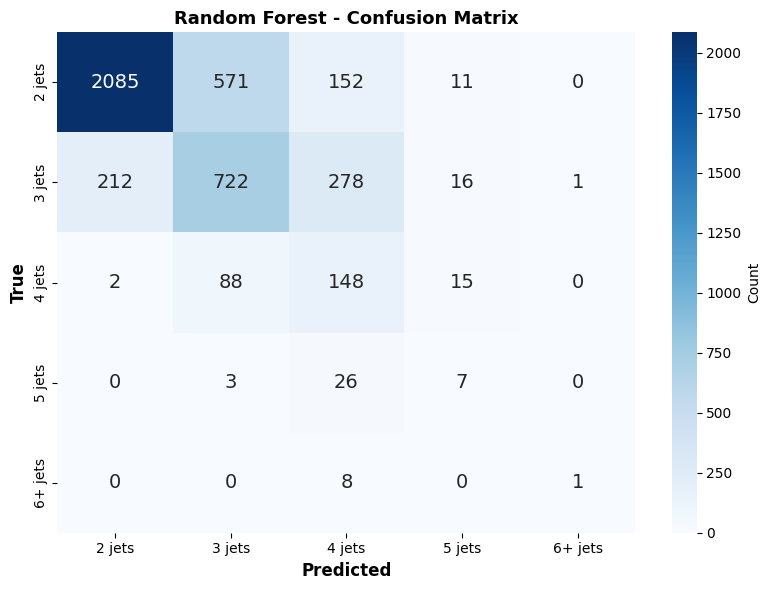


Per-Class Performance:
  2 jets:
    Precision: 0.907
    Recall: 0.740
    F1-Score: 0.815
    Support: 2819
  3 jets:
    Precision: 0.522
    Recall: 0.587
    F1-Score: 0.553
    Support: 1229
  4 jets:
    Precision: 0.242
    Recall: 0.585
    F1-Score: 0.342
    Support: 253
  5 jets:
    Precision: 0.143
    Recall: 0.194
    F1-Score: 0.165
    Support: 36
  6+ jets:
    Precision: 0.500
    Recall: 0.111
    F1-Score: 0.182
    Support: 9


{'model': RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                        random_state=42),
 'train_acc': 0.7856731875719217,
 'test_acc': 0.6817763460653474,
 'y_pred_test': array([1, 3, 2, ..., 0, 0, 0]),
 'cm': array([[2085,  571,  152,   11,    0],
        [ 212,  722,  278,   16,    1],
        [   2,   88,  148,   15,    0],
        [   0,    3,   26,    7,    0],
        [   0,    0,    8,    0,    1]])}

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=42, n_jobs=-1, class_weight='balanced')
eval_model(rfc, X_train, y_train, X_test, y_test, "Random Forest")

Train Accuracy: 0.9993 (99.93%)
Test Accuracy: 0.8247 (82.47%)

Classification Report: 
              precision    recall  f1-score   support

      2 jets       0.87      0.96      0.92      2819
      3 jets       0.74      0.65      0.69      1229
      4 jets       0.43      0.25      0.32       253
      5 jets       0.33      0.03      0.05        36
     6+ jets       0.33      0.11      0.17         9

    accuracy                           0.82      4346
   macro avg       0.54      0.40      0.43      4346
weighted avg       0.80      0.82      0.81      4346



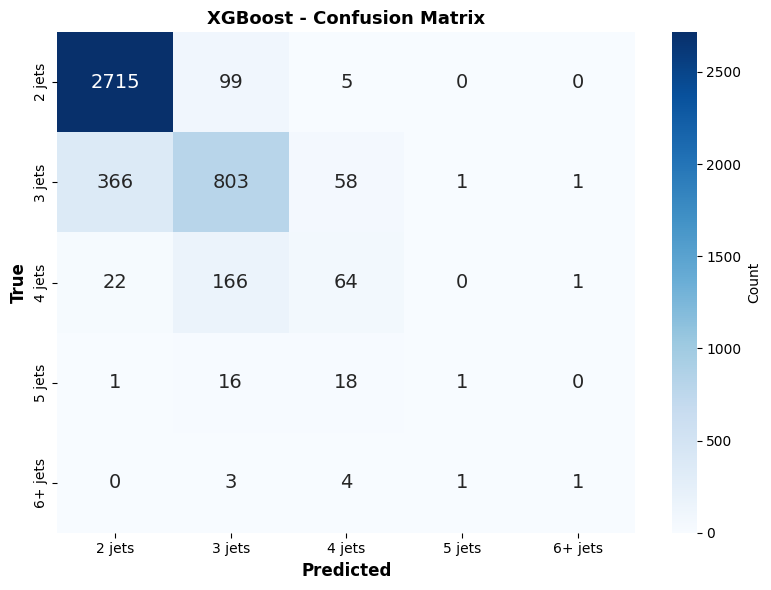


Per-Class Performance:
  2 jets:
    Precision: 0.875
    Recall: 0.963
    F1-Score: 0.917
    Support: 2819
  3 jets:
    Precision: 0.739
    Recall: 0.653
    F1-Score: 0.693
    Support: 1229
  4 jets:
    Precision: 0.430
    Recall: 0.253
    F1-Score: 0.318
    Support: 253
  5 jets:
    Precision: 0.333
    Recall: 0.028
    F1-Score: 0.051
    Support: 36
  6+ jets:
    Precision: 0.333
    Recall: 0.111
    F1-Score: 0.167
    Support: 9


{'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='mlogloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=1, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=500, n_jobs=None, num_class=5, ...),
 'train_acc': 0.9993095512082854,
 'test_acc': 0.8246663598711459,
 'y_pred_test': array([0, 0, 1, ..., 0, 0, 0]),
 'cm': array([[2715,   99,    5,    0,    0],
        [ 366,  803,   58,    1,    1],
        [  22,  166,   64,    

In [ ]:
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    eval_metric='mlogloss',
    n_estimators=500,          # naikkan
    max_depth=8,               # lebih dalam
    learning_rate=0.05,
    min_child_weight=1,
    subsample=0.7,
    colsample_bytree=0.8,
    random_state=42
)
eval_model(xgb, X_train, y_train, X_test, y_test, "XGBoost")

#**Tuning Hyperparameter Model**